DESCRIPTION

Reduce the time a Mercedes-Benz spends on the test bench.

Problem Statement Scenario:
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

Following actions should be performed:

If for any column(s), the variance is equal to zero, then you need to remove those variable(s).

- Check for null and unique values for test and train sets.
- Apply label encoder.
- Perform dimensionality reduction.
- Predict your test_df values using XGBoost.

In [287]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


In [288]:
# Importing train & test datasets
train_data = pd.read_csv('./Datasets/train.csv')
test_data = pd.read_csv('./Datasets/test.csv')

In [289]:
print('Train Data',train_data.shape)
print('Test Data',test_data.shape)

Train Data (4209, 378)
Test Data (4209, 377)


In [290]:
train_data

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


#### **Q. If for any column(s), the variance is equal to zero, then you need to remove those variable(s).**
#### Checking variance

In [291]:
variance = pow(train_data.drop(columns={'ID','y'}).std(),2).to_dict()

zero_var = []
for key, value in variance.items():
    if(value==0):
        print('Column: ',key)
        zero_var.append(key)
print('No of columns which has zero variance = ',len(zero_var))

Column:  X11
Column:  X93
Column:  X107
Column:  X233
Column:  X235
Column:  X268
Column:  X289
Column:  X290
Column:  X293
Column:  X297
Column:  X330
Column:  X347
No of columns which has zero variance =  12


/var/folders/5k/yp3_f__53c38cdrv0bkcgx4m0000gn/T/ipykernel_1343/1253409149.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variance = pow(train_data.drop(columns={'ID','y'}).std(),2).to_dict()


In [292]:
# Droping Columns having zero variance
train_data = train_data.drop(columns=zero_var)
train_data.shape

(4209, 366)

In [293]:
train_data

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


#### **Q. Check for null and unique values for test and train sets.**

In [294]:
# Checking in Train Data
train_data.isna().sum().any()

False

In [295]:
# Checking ion Test Data
test_data.isna().sum().any()

False

#### **Q. Apply label encoder**

In [296]:
from sklearn.preprocessing import LabelEncoder

In [297]:
train_features =  train_data.drop(columns={'ID','y'})
train_target = train_data.y
train_features.shape

(4209, 364)

In [298]:
for i in train_features.describe(include='object').keys():
    le = LabelEncoder()
    train_features[i] = le.fit_transform(train_features[i])

In [299]:
# Label Encoded Features
train_features

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,17,0,3,24,9,14,0,0,...,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,0,0,...,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,0,0,...,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8,20,16,2,3,0,3,16,0,0,...,1,0,0,0,0,0,0,0,0,0
4205,31,16,40,3,3,0,7,7,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,8,23,38,0,3,0,6,4,0,1,...,0,0,1,0,0,0,0,0,0,0
4207,9,19,25,5,3,0,11,20,0,0,...,0,0,0,0,0,0,0,0,0,0


#### **Q. Perform dimensionality reduction.**

In [300]:
from sklearn.decomposition import PCA
pca = PCA(n_components=.95)

In [301]:
train_feature_pca = pca.fit_transform(train_features)
train_feature_pca.shape

(4209, 6)

#### **Q. Predicting on Test Data by XGBoost**

In [302]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [303]:
x_train,x_test,y_train,y_test = train_test_split(train_feature_pca,train_target,test_size=0.3,random_state=7)
print(
    x_train.shape,
    x_test.shape,
    y_train.shape,
    y_test.shape,
)

(2946, 6) (1263, 6) (2946,) (1263,)


In [304]:
xgb_reg = XGBRegressor()

In [305]:
regr = XGBRegressor()
regr.fit(x_train,y_train)
regr_pred = regr.predict(x_test)

In [306]:
print('RMSE = ',sqrt(mean_squared_error(y_test,regr_pred)))

RMSE =  11.095226849772677


In [307]:
gbm_param = {
    'objective':['reg:squarederror'],
              'booster':['gbtree','gblinear'],
    'n_estimators':[40,50,60],
    'max_depth':[3,6,9],
    'learning_rate': [0.05, 0.1, 0.20],
    'min_child_weight': [1, 10, 100],
    
}

In [308]:
rscv = RandomizedSearchCV(estimator=xgb_reg,param_distributions=gbm_param, n_iter=20,n_jobs=-1)

In [309]:
rscv.fit(x_train,y_train)

[18:59:25] WARNING: ../src/learner.cc:576: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:59:25] WARNING: ../src/learner.cc:576: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:59:25] WARNING: ../src/learner.cc:576: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then bein

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,...
                                          scale_pos_weight=None, subsample=None,
                                          tree_method=None,
                                          validate_parameters=None,
  

In [310]:
rscv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=3, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=50, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.5, reg_lambda=5, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [311]:
rscv.best_params_

{'reg_lambda': 5,
 'reg_alpha': 0.5,
 'objective': 'reg:squarederror',
 'n_estimators': 50,
 'min_child_weight': 1,
 'max_depth': 6,
 'learning_rate': 0.2,
 'gamma': 3,
 'booster': 'gbtree'}

In [312]:
xgb_model = rscv.best_estimator_

In [313]:
print('RMSE = ',sqrt(mean_squared_error(y_test,xgb_model.predict(x_test))))

RMSE =  11.045561116904837


##### **Preparing test dataset**

In [314]:
# droping zero variance features
test_variance = pow(test_data.drop(columns={'ID'}).std(),2).to_dict()

test_zero_var = []
for key, value in test_variance.items():
    if(value==0):
        print('Column: ',key)
        test_zero_var.append(key)
print('No of columns which has zero variance = ',len(test_zero_var))

Column:  X257
Column:  X258
Column:  X295
Column:  X296
Column:  X369
No of columns which has zero variance =  5


/var/folders/5k/yp3_f__53c38cdrv0bkcgx4m0000gn/T/ipykernel_1343/3644156715.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test_variance = pow(test_data.drop(columns={'ID'}).std(),2).to_dict()


In [315]:
# Droping Columns having zero variance
test_data = test_data.drop(columns=test_zero_var)
test_data.shape

(4209, 372)

In [316]:
# Checking for null 
test_data.isnull().sum().any()

False

In [317]:
test_data_feature = test_data.drop(columns={'ID'})
print(test_data_feature.shape)

(4209, 371)


#### Applying Label Encoder

In [318]:
test_data_feature.describe(include='object')


,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,49,27,45,7,4,32,12,25
top,ak,aa,as,c,d,v,g,e
freq,432,826,1658,1900,4203,246,1073,274


In [319]:
for i in test_data_feature.describe(include='object').keys():
    le = LabelEncoder()
    test_data_feature[i] = le.fit_transform(test_data_feature[i])

#### Reducing Dimensione

In [320]:
pca_test = PCA(n_components=.95)
test_feature_pca = pca.fit_transform(test_data_feature)
test_feature_pca.shape

(4209, 6)

In [321]:
test_pred = xgb_model.predict(test_feature_pca)
test_pred

array([ 77.697754,  96.1132  ,  89.29095 , ..., 107.46999 , 109.49651 ,
        96.638214], dtype=float32)

In [322]:
df = pd.DataFrame()

df['ID'] = test_data['ID']
df['Y'] = test_pred
df

,ID,Y
0,1,77.697754
1,2,96.113197
2,3,89.290947
3,4,82.501030
4,5,100.732407
...,...,...
4204,8410,106.907753
4205,8411,98.555138
4206,8413,107.469994
4207,8414,109.496513


/Users/abhisheksingh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/abhisheksingh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


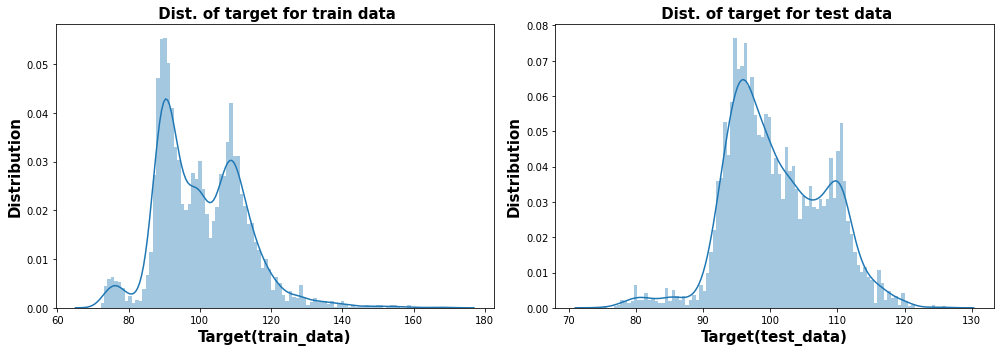

In [323]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

train_plot = sns.distplot(train_target[train_target<200], bins=100, kde=True, ax=ax[0])
train_plot.set_xlabel('Target(train_data)', weight='bold', size=15)
train_plot.set_ylabel('Distribution', weight='bold', size=15)
train_plot.set_title(' Dist. of target for train data', weight='bold', size=15)

test_plot = sns.distplot(test_pred[test_pred<200], bins=100, kde=True, ax=ax[1])
test_plot.set_xlabel('Target(test_data)', weight='bold', size=15)
test_plot.set_ylabel('Distribution', weight='bold', size=15)
test_plot.set_title(' Dist. of target for test data', weight='bold', size=15)


plt.tight_layout()